In [34]:
import pandas as pd

zip_df = pd.read_csv("../data/zip_df.csv", index_col = 0)
city_df = pd.read_csv("../data/property_assessments.csv")
counts = city_df.groupby('ZIP').count()['PROP_ID']
rename = dict()
for zip in counts.index:
   rename[zip] = '0' + str(int(zip))
counts = counts.rename(rename)
counts = counts.to_frame('num_buildings')
counts = counts.reset_index()
counts = counts.rename(columns={'ZIP': 'Location'})
zip_df = pd.merge(zip_df, counts, on='Location')

zip_df['Total Normalized'] = zip_df['Total'] / zip_df['num_buildings']

zip_df.to_csv('../data/zip_df_with_num_buildings.csv')
zip_df.head()

/var/folders/9b/sjn5rckx2sb9zx_nzvmj2y1r0000gn/T/ipykernel_40284/338985492.py:4: DtypeWarning: Columns (15,22,24,42) have mixed types. Specify dtype option on import or set low_memory=False.
  city_df = pd.read_csv("../data/property_assessments.csv")


,Location,Hot Water,Potable Water,Heating Facilities Required,Temperature Requirements,Asbestos Material,Use of Lead Paint Prohibited,Safe Condition,Smoke Detectors and Carbon Monoxide Alarms,Total,num_buildings,Total Normalized
0,02128,9.0,0.0,20.0,11.0,0.0,0.0,4.0,51.0,95.0,6521,0.014568
1,02124,9.0,2.0,9.0,9.0,0.0,0.0,1.0,62.0,92.0,9271,0.009923
2,02121,12.0,1.0,15.0,11.0,0.0,1.0,1.0,51.0,92.0,3768,0.024416
3,02114,5.0,0.0,13.0,9.0,0.0,0.0,5.0,45.0,77.0,1089,0.070707
4,02119,16.0,0.0,11.0,8.0,0.0,0.0,1.0,29.0,65.0,4814,0.013502


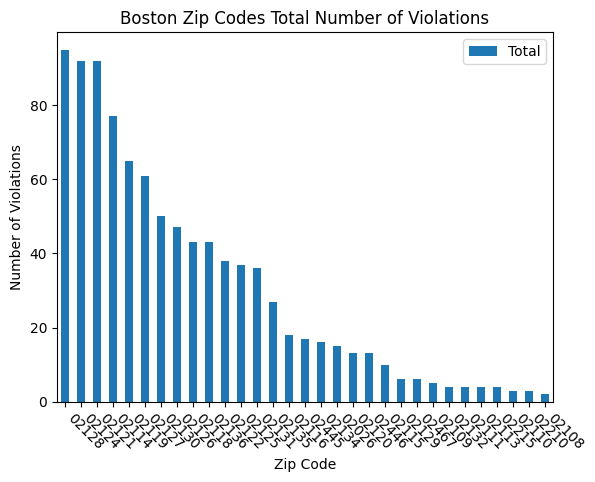

In [26]:
import matplotlib.pyplot as plt
zip_df.sort_values(by = "Total", ascending = False)
zip_df[['Location', 'Total']].set_index('Location').plot(kind='bar', rot=0) #set index works but I don't want to have problems later

#plt.locator_params(axis='x', nbins = 10)
plt.xticks(rotation=-45, ha = 'left')

plt.title("Boston Zip Codes Total Number of Violations")
plt.xlabel('Zip Code')
plt.ylabel('Number of Violations')
plt.show()

#TODO: fix formatting



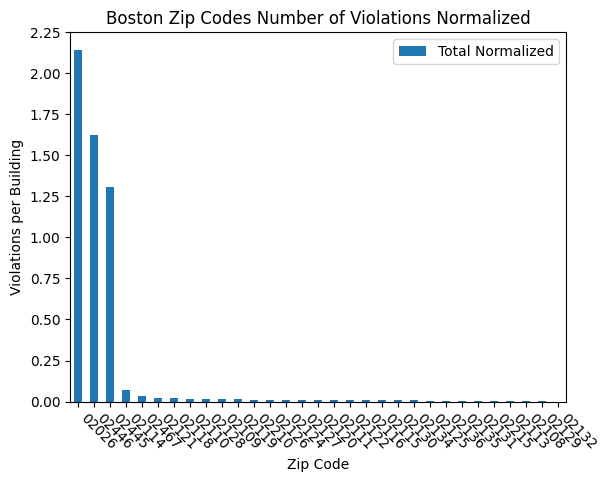

In [33]:
zip_new = zip_df.sort_values(by = "Total Normalized", ascending = False)

zip_new[['Location', 'Total Normalized']].set_index('Location').plot(kind='bar', rot=0) #set index works but I don't want to have problems later


plt.xticks(rotation=-45, ha = 'left')

plt.title("Boston Zip Codes Number of Violations Normalized")
plt.xlabel('Zip Code')
plt.ylabel('Violations per Building')
plt.show()


In [18]:
buildings_df = pd.read_csv("../data/buildings_df.csv", index_col = 0)

counts1 = city_df.groupby('SITE_ADDR').count()['PROP_ID']
rename1 = dict()

# for zip in counts1.index:
#    rename1[zip] = '0' + str(int(zip))
# counts1 = counts1.rename(rename1)
counts1 = counts1.to_frame('num_units')
counts1 = counts1.reset_index()

counts1 = counts1.rename(columns={'SITE_ADDR': 'Location'})
counts1['Location'] = counts1['Location'].apply(lambda x: str(x).lower())
counts1
buildings_df = pd.merge(buildings_df, counts, on='Location')

#buildings_df['Total Normalized'] = buildings_df['Total'] / buildings_df['num_units']
buildings_df.head()
#buildings_df.to_csv('../data/buildings_df_with_num_units.csv')

,Location,Hot Water,Potable Water,Heating Facilities Required,Temperature Requirements,Asbestos Material,Use of Lead Paint Prohibited,Safe Condition,Smoke Detectors and Carbon Monoxide Alarms,Total,num_buildings
